Titanic Dataset

Data Preprocessing

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix,f1_score
from sklearn.metrics import classification_report, roc_auc_score,recall_score,precision_score,roc_curve,auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("titanic .csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.shape

(891, 12)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# impute age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop unnecessary columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Impute  Embarked with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Sex' column
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# One-hot encode the 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True


In [16]:
# Define features and target variable
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [18]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the Logistic Regression model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression:
Accuracy: 0.8100558659217877


In [19]:
# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Make predictions
y_pred_decision_tree = decision_tree.predict(X_test_scaled)

# Evaluate the Decision Tree model
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_decision_tree))

Decision Tree:
Accuracy: 0.7877094972067039


1. Evaluating Logistic Regression with Cross-Validation

Single train-test split

In [20]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the Logistic Regression model
print("Single train-test split:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Single train-test split:
Accuracy: 0.8100558659217877


K-fold cross-validation

In [21]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.82517483 0.8041958  0.78873239 0.73943662 0.78873239]
Mean cross-validation score: 0.7892544075642667


2. Analyzing Overfitting and Underfitting in Decision Trees

In [22]:
# arrays to store accuracies
train_accuracies = []
validation_accuracies = []

# range of depths to test
depths = range(1, 21)

for depth in depths:
    # Initialize and train the Decision Tree model
    decision_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    decision_tree.fit(X_train_scaled, y_train)
    
    # Evaluate on the training data
    train_pred = decision_tree.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)
    
    # Evaluate on the validation data
    validation_pred = decision_tree.predict(X_test_scaled)
    validation_accuracy = accuracy_score(y_test, validation_pred)
    validation_accuracies.append(validation_accuracy)

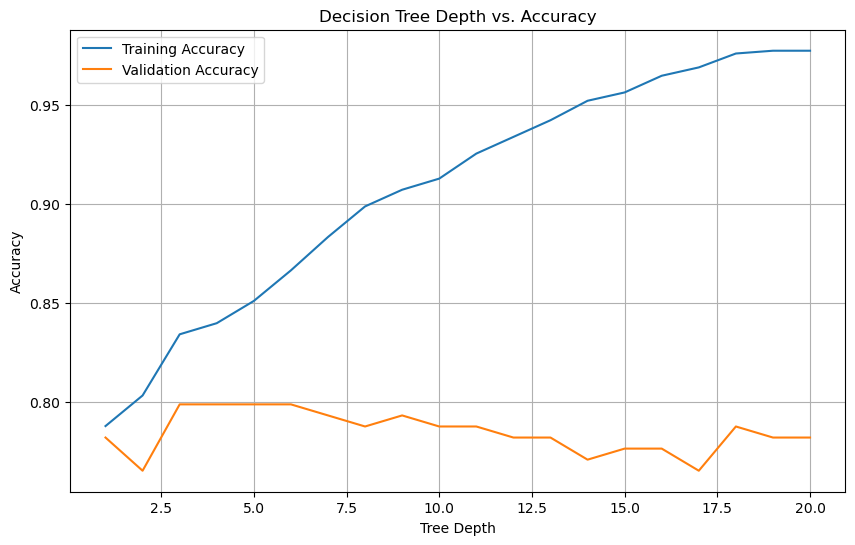

In [41]:
# Plot the training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, validation_accuracies, label='Validation Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

3. Calculating Precision, Recall, and F1-Score for Logistic Regression

In [23]:
# Calculate Precision
precision = precision_score(y_test, y_pred_log_reg)

# Calculate Recall
recall = recall_score(y_test, y_pred_log_reg)

# Calculate F1-Score
f1 = f1_score(y_test, y_pred_log_reg)

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall:{recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.7857
Recall:0.7432
F1-Score: 0.7639


4. ROC Curve Analysis for Decision Trees

In [77]:
# Train the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# predicted probabilities for the positive class
y_pred_proba = decision_tree.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

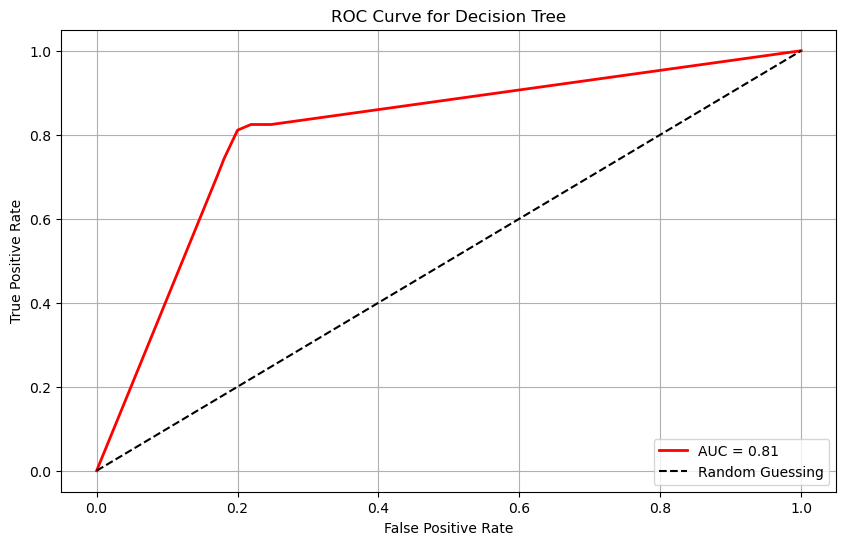

In [79]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='red', lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

5. Comparing Model Performance with and without Cross-Validation

Logistic Regression without Cross-Validation

In [84]:
# Initialize Logistic Regression and Decision Tree models
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

# Train and evaluate Logistic Regression without Cross-Validation
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)

print("Logistic Regression without Cross-Validation:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")

Logistic Regression without Cross-Validation:
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432


Logistic Regression with Cross-Validation

In [86]:
# Logistic Regression with Cross-Validation
accuracy_cv_log_reg = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
precision_cv_log_reg = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='precision').mean()
recall_cv_log_reg = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='recall').mean()

print("\nLogistic Regression with Cross-Validation:")
print(f"Accuracy: {accuracy_cv_log_reg:.4f}")
print(f"Precision: {precision_cv_log_reg:.4f}")
print(f"Recall: {recall_cv_log_reg:.4f}")


Logistic Regression with Cross-Validation:
Accuracy: 0.7893
Precision: 0.7418
Recall: 0.6751


Decision Tree without Cross-Validation

In [85]:
# Train and evaluate Decision Tree without Cross-Validation
decision_tree.fit(X_train_scaled, y_train)
y_pred_dt = decision_tree.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

print("\nDecision Tree without Cross-Validation:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")


Decision Tree without Cross-Validation:
Accuracy: 0.7877
Precision: 0.7432
Recall: 0.7432


Decision Tree with Cross-Validation

In [87]:
# Decision Tree with Cross-Validation
accuracy_cv_dt = cross_val_score(decision_tree, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
precision_cv_dt = cross_val_score(decision_tree, X_train_scaled, y_train, cv=5, scoring='precision').mean()
recall_cv_dt = cross_val_score(decision_tree, X_train_scaled, y_train, cv=5, scoring='recall').mean()

print("\nDecision Tree with Cross-Validation:")
print(f"Accuracy: {accuracy_cv_dt:.4f}")
print(f"Precision: {precision_cv_dt:.4f}")
print(f"Recall: {recall_cv_dt:.4f}")


Decision Tree with Cross-Validation:
Accuracy: 0.7529
Precision: 0.6664
Recall: 0.6941
